In [ ]:
# Style: Sequential API

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


2024-11-10 15:29:14.119421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_path = '/Users/mobin/Documents/quant finance Interview/My interviews/Kaggle/'
df = pd.read_csv(file_path + 'spam.csv',encoding='latin-1')

print(df.head())

print("statistical_summary: ")
statistical_summary = df.describe()
print(statistical_summary)



df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
statistical_summary: 
          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   

ValueError: could not convert string to float: 'ham'

In [ ]:
from scipy import stats

X = df.v2
Y = df.v1
le = LabelEncoder() # encode categorical labels into numeric form.
Y = le.fit_transform(Y) # converts categorical labels in Y to numeric values. - change Y to numpy array (New dimensions: (5572,))
Y = Y.reshape(-1,1) # Reshapes Y into a 2D array with one column. (New dimensions: (5572,1))



summary = stats.describe(Y)
print("summar:" , summary)


# statistical_summary = Y.describe()
# print(statistical_summary)


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)
print(X_test.iloc[0])

max_words = 1000 # Sets the maximum number of words to be used in the vocabulary. Controls vocabulary size, and limits the vocabulary to the most frequent words,
max_len = 150  # max length for each sequence in the input data
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train) # Builds the vocabulary based on the frequency of words in X_train.
sequences = tok.texts_to_sequences(X_train) # Converts each text (sequence of words) in X_train to a sequence of integers.
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len) # Pad or truncate each sequence to ensure they all have a length of 150.

summar: DescribeResult(nobs=5572, minmax=(array([0]), array([1])), mean=array([0.13406317]), variance=array([0.11611108]), skewness=array([2.14801971]), kurtosis=array([2.61398867]))
I'm awake oh. What's up.


In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Activation, Dropout
from keras.layers import Bidirectional

# Sequential API Style:
def RNN():
    model = Sequential()
    # Find an embedding for each word in the vocabulary, and convert input (sequence of integers) to sequence of dense vectors (each of size 50)
    # Input: (batch_size, 1000)   [integer values from 0 to 999)
    # Output: (batch_size, 150, 50) [continues values between [-1,+1]]
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))  
    # model.add(LSTM(64))  # LSTM layer with 64 units. Default values:  activation='tanh', recurrent_activation='sigmoid'
    # Input: LSTM can handle 3D input directly.
    # Output: (batch_size, 128)
    model.add(Bidirectional(LSTM(64)))  # Bidirectional LSTM
    # Input: Expect 2D input: (batch_size, features)
    # Output: (batch_size, 256) 
    model.add(Dense(256, activation='relu'))  # Fully connected layer with 256 units and ReLU activation
    model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
    model.add(Dense(1, activation='sigmoid'))  # Output layer with a single unit and sigmoid activation

    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) # Configure model for training
#  binary_crossentropy: Typically used for binary classification problems.
#  RMSprop, Adam, AdaGrad: optimization algorithm.
#  'accuracy': The metric to be evaluated by the model during training and testing.

history = model.fit(
    sequences_matrix,
    Y_train,
    batch_size=128,        # batch_size=128: Number of samples per gradient update.
    epochs=10,             # epochs=10: Number of times to iterate over the entire dataset.
    validation_split=0.2,  # validation_split=0.2: Uses 20% of the training data for validation.
    callbacks=[            # EarlyStopping: Stops training when a monitored metric has stopped improving.
        EarlyStopping(monitor='val_loss',min_delta=0.0001) # monitor='val_loss': Monitor validation loss.
        ]                  # min_delta=0.0001: Minimum change in the monitored quantity to qualify as an improvement.
    )



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               58880     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 142,161
Trainable params: 142,161
Non-trainable params: 0
_________________________________________________________________


/Users/mobin/anaconda3/envs/sfusd-project/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 30s 8ms/step - loss: 0.4515 - accuracy: 0.8506 - val_loss: 0.2970 - val_accuracy: 0.8629
Epoch 2/10
3788/3788 [==============================] - 29s 8ms/step - loss: 0.1641 - accuracy: 0.9364 - val_loss: 0.0558 - val_accuracy: 0.9842
Epoch 3/10
3788/3788 [==============================] - 38s 10ms/step - loss: 0.0477 - accuracy: 0.9873 - val_loss: 0.0391 - val_accuracy: 0.9873
Epoch 4/10
3788/3788 [==============================] - 44s 12ms/step - loss: 0.0307 - accuracy: 0.9918 - val_loss: 0.0391 - val_accuracy: 0.9895


In [58]:
from sklearn.metrics import roc_auc_score

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss:', accr[0], '\n  Accuracy:', accr[1])

predictions = model.predict(test_sequences_matrix) # Make prediction


# Tokenize the text
sample_text = tok.texts_to_sequences(["Hi Sam, How are you?"]) # important to keep the input in the bracket / list format
# Pad the sequence
single_sequence_matrix = sequence.pad_sequences(sample_text,maxlen=max_len) 

prediction = model.predict(single_sequence_matrix) # Make prediction

print(prediction)
threshold = 0.5 # Threshold to classify it as positive or negative
if prediction[0][0] > threshold:
    print ("Positive ", prediction[0][0])
else:
    print("Negative ", prediction[0][0])

836/836 [==============================] - 3s 4ms/step
Test set
  Loss: 0.049496893414505645 
  Accuracy: 0.9844497442245483
[[0.00414359]]
Negative  0.0041435943


In [59]:

roc_auc = roc_auc_score(Y_test, predictions)
print('ROC AUC Score:', roc_auc)


prediction  [[0.00414359]]
ROC AUC Score: 0.989797247427604


In [10]:
import numpy as np

# Assuming you've already trained your model and have X_test, Y_test, and test_sequences_matrix

# Make predictions on the test set
test_predictions = model.predict(test_sequences_matrix)

# Function to convert numeric prediction to label
def get_label(prediction, threshold=0.5):
    return "spam" if prediction > threshold else "ham"

# Get the original labels
original_labels = le.inverse_transform(Y_test.flatten())

# Display predictions alongside the original texts and labels
for i, (text, true_label, prediction) in enumerate(zip(X_test, original_labels, test_predictions)):
    predicted_label = get_label(prediction[0])
    if predicted_label == "ham":
        continue
    print(f"Text {i+1}:")
    print(f"Original text: {text}")
    print(f"True label: {true_label}")
    print(f"Predicted label: {predicted_label}")
    print(f"Prediction probability: {prediction[0]:.4f}")
    print("------------------------")

# Calculate and display overall accuracy
accuracy = np.mean(
    (test_predictions > 0.5).flatten() == Y_test.flatten()
)
print(f"Overall accuracy on test set: {accuracy:.4f}")

Text 4:
Original text: You have been specially selected to receive a 2000 pound award! Call 08712402050 BEFORE the lines close. Cost 10ppm. 16+. T&Cs apply. AG Promo
True label: spam
Predicted label: spam
Prediction probability: 0.9983
------------------------
Text 16:
Original text: XMAS iscoming & ur awarded either å£500 CD gift vouchers & free entry 2 r å£100 weekly draw txt MUSIC to 87066 TnC www.Ldew.com1win150ppmx3age16subscription 
True label: spam
Predicted label: spam
Prediction probability: 0.9999
------------------------
Text 19:
Original text: FREE for 1st week! No1 Nokia tone 4 ur mobile every week just txt NOKIA to 8077 Get txting and tell ur mates. www.getzed.co.uk POBox 36504 W45WQ 16+ norm150p/tone
True label: spam
Predicted label: spam
Prediction probability: 0.9997
------------------------
Text 26:
Original text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


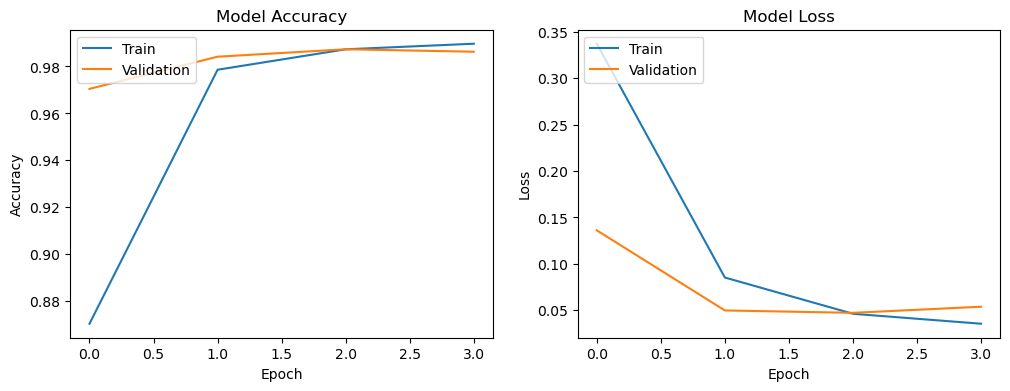

In [35]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)                                   # Create subplot for accuracy
plt.plot(history.history['accuracy'])                  # Plot training accuracy
plt.plot(history.history['val_accuracy'])              # Plot validation accuracy
plt.title('Model Accuracy')                            # Title of the plot
plt.ylabel('Accuracy')                                 # Y-axis label
plt.xlabel('Epoch')                                    # X-axis label
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend

# Plot training & validation loss values
plt.subplot(1, 2, 2)                                   # Create subplot for loss
plt.plot(history.history['loss'])                      # Plot training loss
plt.plot(history.history['val_loss'])                  # Plot validation loss
plt.title('Model Loss')                                # Title of the plot
plt.ylabel('Loss')                                     # Y-axis label
plt.xlabel('Epoch')                                    # X-axis label
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend

plt.show()  